# PCA

PCA (анализ основных компонентов) — это метод, используемый в машинном обучении для уменьшения размерности набора данных. Он используется для борьбы с проклятием размерности, которое относится к проблемам, возникающим при работе с наборами данных, которые имеют большое количество функций.

Проклятие размерности может затруднить анализ и моделирование данных, поскольку количество признаков экспоненциально растет с увеличением количества измерений. Это может привести к переоснащению, снижению производительности и увеличению вычислительной сложности.

PCA работает, определяя наиболее важные функции в наборе данных и уменьшая размерность за счет проецирования данных в пространство с меньшим размером. Это делается путем нахождения основных компонентов данных, которые представляют собой линейные комбинации исходных признаков, отражающих наибольшее разнообразие данных. Количество выбранных главных компонентов определяет размерность сокращенного набора данных.

Создаем набор данных:

In [1]:
import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # устанавливаем 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # неравномерное распределение
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # овал
X += 0.28 * np.random.randn(m, 3)  # и немного шума
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # немного смещения

Следующий код Python использует функцию NumPy svd() для получения всех основных компонентов трехмерного обучающего набора, а затем извлекает два единичных вектора, которые определяют первые два PC (основных компонента): 

In [2]:
X_centered = X - X.mean(axis=0) 
U, s, Vt = np.linalg.svd(X_centered) 
c1 = Vt[0] 
c2 = Vt[1]

Этот код выполняет анализ основных компонентов (PCA) на матрице входных данных X, используя метод разложения по сингулярным значениям (SVD). Вот разбивка кода:

X_centered = X - X.mean(axis=0): эта строка вычисляет среднее значение каждого признака в матрице входных данных X и вычитает его из каждой точки данных в X. Это центрирует данные вокруг начала координат, что является предварительным условием для PCA.

U, s, Vt = np.linalg.svd(X_centered): Эта строка вычисляет разложение по сингулярным значениям центрированной матрицы данных X_centered. SVD разлагает матрицу на три матрицы: U, s и Vt. U и Vt — ортогональные матрицы, а s — диагональная матрица, содержащая сингулярные значения X_centered.

c1 = Vt[0]и c2 = Vt[1]: Эти строки извлекают первые два столбца матрицы Vt, которые соответствуют первому и второму главным компонентам данных. Эти главные компоненты являются направлениями, в которых данные изменяются больше всего.

Примечание:

 классы PCA Scikit-Learn позаботятся о центрировании данных за вас. Если вы реализуете PCA самостоятельно (как в предыдущем примере) или используете другие библиотеки, не забудьте сначала центрировать данные. 

Чтобы спроецировать обучающий набор на гиперплоскость и получить сокращенный набор данных X d -proj размерности d , вычислите матричное умножение матрицы обучающего набора X на матрицу W d , заданную как матрица, содержащая первые d столбцов V: $X_{d -proj} = X*W_d$

In [4]:
W2 = Vt[:2].T # Эта строка извлекает первые две строки транспонированной матрицы Vt и присваивает их переменной W2. 
# Эти две строки соответствуют первому и второму основным компонентам данных, 
# и транспонирование матрицы превращает их в два вектора-столбца.
X2D = X_centered @ W2 # Эта строка вычисляет матричное умножение центрированной матрицы данных X_centered на матрицу W2. 
# Это проецирует данные на подпространство, охватываемое первыми двумя 
# главными компонентами, что приводит к низкоразмерному представлению данных в переменной X2D

## Использование Scikit-Learn 

In [5]:
from sklearn.decomposition import PCA 
 
pca = PCA(n_components=2) 
X2D = pca.fit_transform(X) 

Коэффициент дисперсии:

In [6]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

Этот вывод говорит нам о том, что около 76% дисперсии набора данных приходится на первый основной компонент, а около 15% — на второй. Это оставляет около 9% для третьего компанента, поэтому разумно предположить, что третий PC, вероятно, несет мало информации. 

## Выбор количества измерений

Вместо того, чтобы произвольно выбирать количество измерений, до которых нужно уменьшить, проще выбрать количество измерений, которые в сумме составляют достаточно большую часть дисперсии, скажем, 95% (Исключением из этого правила, конечно, является случай, когда вы уменьшаете размерность для визуализации данных, и в этом случае вы захотите уменьшить размерность до 2 или 3). 

Следующий код загружает и разбивает набор данных MNIST и выполняет PCA без уменьшения размерности, а затем вычисляет минимальное количество измерений, необходимое для сохранения 95% дисперсии обучающего набора: 

In [8]:
from sklearn.datasets import fetch_openml 
 
mnist = fetch_openml('mnist_784', as_frame=False) # загрузка датасета
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000] 
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:] 
 
pca = PCA() 
pca.fit(X_train) 
cumsum = np.cumsum(pca.explained_variance_ratio_) # Эта строка вычисляет кумулятивную сумму объясненных коэффициентов дисперсии 
# всех основных компонентов, вычисленных PCA. 

d = np.argmax(cumsum >= 0.95) + 1  # эта строка находит индекс первого элемента в массиве кумулятивной суммы, 
# который больше или равен 0,95 (т.е. точка, в которой объясняется 95% дисперсии данных) и добавляет к нему 1, 
# чтобы получить число главных компонент, необходимых для объяснения 95% дисперсии.
d # 154 компанента

154

Можно применить такую запись, где  n_components - число с плавающей запятой от 0,0 до 1,0, указывающее коэффициент дисперсии, который вы хотите сохранить:

In [9]:
pca = PCA(n_components=0.95) 
X_reduced = pca.fit_transform(X_train) 

In [10]:
pca.n_components_

154

В следующем примере кода создается двухэтапный конвейер: сначала уменьшается размерность с помощью PCA, а затем выполняется классификация с использованием случайного леса:

In [11]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.pipeline import make_pipeline 
 
clf = make_pipeline(PCA(random_state=42), 
                    RandomForestClassifier(random_state=42)) # ковейер трансформации
param_distrib = { 
    "pca__n_components": np.arange(10, 80), # гиперпараметры для РСА
    "randomforestclassifier__n_estimators": np.arange(50, 500) # гиперпараметры для случайного леса
} 
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, 
                                random_state=42) # подбор гиперпараметров
rnd_search.fit(X_train[:1000], y_train[:1000]) 

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [12]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}

## Реконструкция набора данных

Также можно распаковать сокращенный набор данных обратно. Это не вернет исходные данные, так как проекция потеряла немного информации (в пределах 5%-ной дисперсии, которая была удалена), но она, вероятно, будет близка к исходным данным. Среднеквадратичное расстояние между исходными данными и реконструированными данными (сжатыми, а затем распакованными) называется ошибкой реконструкции . 

Этот inverse_transform() метод позволяет нам распаковать уменьшенный набор данных MNIST обратно до 784 измерений: 

In [13]:
X_recovered = pca.inverse_transform(X_reduced) 

## Рандомизированный PCA 

Если для гиперпараметра установлено svd_solver значение "randomized", Scikit-Learn использует стохастический алгоритм, называемый рандомизированным PCA:

In [15]:
rnd_pca = PCA(n_components=154, svd_solver= 'randomized', random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

Если вы хотите заставить Scikit-Learn использовать полный SVD для более точного результата, вы можете установить гиперпараметр svd_solver на "full". 

## Инкрементный PCA 

Алгоритмы инкрементного PCA (IPCA) позволяют разбивать обучающий набор на мини-пакеты и подавать их по одному мини-пакету за раз.

Следующий код разбивает обучающий набор MNIST на 100 мини-пакетов (с помощью функции NumPy ) и передает их в класс array_split() Scikit-Learn⁠, чтобы уменьшить размерность набора данных MNIST до 154 измерений, как и раньше.

In [16]:
from sklearn.decomposition import IncrementalPCA 
 
n_batches = 100 
inc_pca = IncrementalPCA(n_components=154) 
for X_batch in np.array_split(X_train, n_batches): 
    inc_pca.partial_fit(X_batch) 
 
X_reduced = inc_pca.transform(X_train) 

В качестве альтернативы вы можете использовать класс NumPy memmap, который позволяет вам манипулировать большим массивом, хранящимся в двоичном файле на диске, как будто он полностью находится в памяти; класс загружает в память только те данные, которые ему нужны, и тогда, когда они ему нужны. Чтобы продемонстрировать это, давайте сначала создадим файл с отображением памяти (memmap) и скопируем в него обучающий набор MNIST, а затем вызовем его - flush(), чтобы убедиться, что все данные, все еще находящиеся в кеше, будут сохранены на диск. В реальной жизни X_train обычно не помещается в память, поэтому вы загружаете его по частям и сохраняете каждую часть в правой части массива memmap: 

In [17]:
filename = "my_mnist.mmap" 
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape) 
X_mmap[:] = X_train  # вместо этого может быть цикл, сохраняющий данные по частям
X_mmap.flush() 

Затем мы можем загрузить файл memmap и использовать его как обычный массив NumPy. Давайте воспользуемся IncrementalPCA классом, чтобы уменьшить его размерность. Поскольку этот алгоритм использует только небольшую часть массива в любой момент времени, использование памяти остается под контролем. Это дает возможность вызывать обычный fit() метод вместо partial_fit(), что довольно удобно: 

In [18]:
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784) 
batch_size = X_mmap.shape[0] // n_batches 
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size) 
inc_pca.fit(X_mmap) 

IncrementalPCA(batch_size=600, n_components=154)

# Случайная проекция

Основная идея случайной проекции заключается в том, что многие многомерные наборы данных имеют низкую внутреннюю размерность, а это означает, что данные фактически находятся близко к подпространству более низкой размерности. Случайная проекция использует этот факт, проецируя данные на случайное низкоразмерное подпространство, которое имеет высокую вероятность захвата важной информации в данных.

Для выполнения случайной проекции мы сначала генерируем случайную матрицу с размерностями, равными желаемому количеству выходных измерений (т. е. размерности подпространства меньшей размерности). Каждый элемент матрицы взят из стандартного нормального распределения (т. е. распределения Гаусса со средним значением 0 и дисперсией 1).

Затем мы проецируем многомерную матрицу данных на случайную матрицу, используя матричное умножение. Результирующая матрица имеет то же количество строк, что и исходная матрица данных, но количество столбцов равно желаемому количеству выходных измерений. Это дает нам низкоразмерное представление данных.

Одним из основных преимуществ случайного проецирования является то, что оно эффективно с точки зрения вычислений, поскольку проецирование может быть выполнено с использованием простого матричного умножения. Это также непараметрический метод, что означает, что он не делает предположений об основном распределении данных.

In [19]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim 
m, ε = 5_000, 0.1 
# m - количество экземпляров
# ε - расстояние между любыми двумя экземплярами
d = johnson_lindenstrauss_min_dim(m, eps=ε) 
d 


7300

In [20]:
n = 20_000 
# n - число признаков
np.random.seed(42) 
P = np.random.randn(d, n) / np.sqrt(d)  # сгенерируем случайную матрицу P формы [ d , n ], где каждый элемент случайным образом выбирается из 
# распределения Гаусса со средним значением 0 и дисперсией 1/ d 
 
X = np.random.randn(m, n)  # случайный датасет
X_reduced = X @ P.T 

Scikit-Learn предлагает GaussianRandomProjection класс, который делает именно то, что мы только что сделали: когда вы вызываете его fit() метод, он использует его johnson_lindenstrauss_min_dim() для определения выходной размерности, а затем генерирует случайную матрицу, которую сохраняет в components_ атрибуте.  Затем, когда вы вызываете transform(), он использует эту матрицу для выполнения проекции.

In [21]:
from sklearn.random_projection import GaussianRandomProjection 
 
gaussian_rnd_proj = GaussianRandomProjection(eps=0.1, random_state=42) 
X_reduced = gaussian_rnd_proj.fit_transform(X)  # тот же рузультат, что и выше

Scikit-Learn также предоставляет второй преобразователь случайных проекций, известный как SparseRandomProjection. Точно так же он определяет целевую размерность, генерирует случайную матрицу той же формы и точно так же выполняет проекцию. Основное отличие состоит в том, что случайная матрица является разреженной. Это означает, что он использует гораздо меньше памяти: около 25 МБ вместо почти 1,2 ГБ в предыдущем примере!

Если вы хотите выполнить обратное преобразование, вам сначала нужно вычислить псевдоинверсию матрицы компонентов с помощью pinv() функции SciPy, а затем умножить уменьшенные данные на транспонирование псевдоинверсии: 

In [22]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_) 
X_recovered = X_reduced @ components_pinv.T 

# Локально-линейное вложение (LLE) ⁠ 

Это многообразный метод обучения, который не полагается на проекции, в отличие от PCA и случайной проекции. В двух словах, LLE работает, сначала измеряя, как каждый обучающий экземпляр линейно связан со своими ближайшими соседями, а затем ищет низкоразмерное представление обучающего набора, в котором эти локальные отношения лучше всего сохраняются (подробности чуть позже). Такой подход особенно хорош при развертывании скрученных коллекторов, особенно когда не слишком много шума.

Следующий код делает швейцарский рулон, а затем использует LocallyLinearEmbedding класс Scikit-Learn для его развертывания: 

In [23]:
from sklearn.datasets import make_swiss_roll # набор данных
from sklearn.manifold import LocallyLinearEmbedding 
 
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42) 
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42) 
X_unrolled = lle.fit_transform(X_swiss) 

# Другие методы уменьшения размерности 

Кратко рассмотрим несколько других популярных методов уменьшения размерности, доступных в Scikit-Learn: 

- sklearn.manifold.MDS 

Многомерное масштабирование (MDS) уменьшает размерность, пытаясь сохранить расстояния между экземплярами. Случайная проекция делает это для многомерных данных, но плохо работает с низкоразмерными данными. 

- sklearn.manifold.Isomap 

Isomap создает граф, соединяя каждый экземпляр с его ближайшими соседями, а затем уменьшает размерность, пытаясь сохранить геодезические расстояния между экземплярами. Геодезическое расстояние между двумя узлами в графе — это количество узлов на кратчайшем пути между этими узлами. 

- sklearn.manifold.TSNE 

t-распределенное стохастическое встраивание соседей (t-SNE) уменьшает размерность, пытаясь держать похожие экземпляры близкими, а непохожие экземпляры разделенными. Он в основном используется для визуализации, в частности, для визуализации кластеров экземпляров в многомерном пространстве. 

- sklearn.discriminant_analysis.LinearDiscriminantAnalysis 

Линейный дискриминантный анализ (LDA) — это алгоритм линейной классификации, который во время обучения изучает наиболее дискриминационные оси между классами. Затем эти оси можно использовать для определения гиперплоскости, на которую будут проецироваться данные. Преимущество этого подхода заключается в том, что проекция будет держать классы как можно дальше друг от друга, поэтому LDA является хорошим методом для уменьшения размерности перед запуском другого алгоритма классификации (если только LDA не достаточно). 

# ПРАКТИКА

ВОПРОСЫ:

- Каковы основные мотивы уменьшения размерности набора данных? Каковы основные недостатки? (ответ: ускорить обучение; визуализировать данные и получить представление о наиболее важных признаках; для экономии памяти (сжатие данных). Недостатки: потеря информации с последующим снижением производительности обучения, преобразованные данные трудно интерпретировать, усложняет конвейеры трансформации).   

- Что такое проклятие размерности? (ответ: возникает риск переобучения, без большого объема данных становится труднее выявить закономерности). 

- Можно ли отменить операцию после уменьшения размерности набора данных? Если да, то как? Если нет, то почему? (ответ: полностью отменить операцию уменьшения размерности данных невозможно, какая-то часть данных будет потеряна в любом случае, также существуют алгоритмы для которых достаточно легко восстановить набор данных, похожий на исходный, например PCA,  другие алгоритмы (например, t-SNE) этого не делают). 

- Можно ли использовать PCA для уменьшения размерности сильно нелинейного набора данных? (ответ: можно при условии бесполезности признаков, от которых мы собираемся избавится, в случае если все нелинейные признаки важны лучше выбрать другой способ). 

- Предположим, вы выполняете PCA для 1000-мерного набора данных, устанавливая коэффициент объясненной дисперсии равным 95 %. Сколько измерений будет иметь результирующий набор данных? (ответ: зависит от набора данных, от 1 до 950 измерений в данном случае, с условием, что это число измерений должно соответствовать 95% дисперсии). 

- В каких случаях вы бы использовали обычный PCA, инкрементный PCA, рандомизированный PCA или случайную проекцию? (ответ: Инкрементный РСА используется для больших наборов данных, которые не помещаются в памяти, а также он удобен если надо решить он-лайн задачу, когда каждый новый экземпляр требует применения РСА метода. Рандомизированный РСА используется в случае если набор данных помещается в памяти и при это его требуется значительно уменьшить, этот метод будет быстрее, чем простой РСА. Случайная проекция подходит для очень многомерных наборов данных. В остальных случаях принято по умолчанию использовать обычный РСА). 

- Как вы можете оценить производительность алгоритма уменьшения размерности в вашем наборе данных? (ответ: можно измерить ошибку реконструкции преобразовав уменьшенный набор данных или измерить качество модели машинного обучения до и после уменьшения размерности). 

- Есть ли смысл связывать два разных алгоритма уменьшения размерности? (для сокращения времени обработки алгоритма уменьшения размерности можно применить сначала РСА или случайную проекцию, чтоб отбросить наиболее бесполезные признаки, а затем локально-линейные вложения. Это будет быстрее, чем просто применить локально-линейное вложение)

## Задача №1

Загрузите набор данных MNIST и разделите его на обучающий набор и тестовый набор (возьмите первые 60 000 экземпляров для обучения, а остальные 10 000 — для тестирования). Обучите классификатор случайного леса на наборе данных и определите, сколько времени это займет, а затем оцените полученную модель на тестовом наборе. Затем используйте PCA для уменьшения размерности набора данных с объясненным коэффициентом дисперсии 95%. Обучите новый классификатор случайного леса на сокращенном наборе данных и посмотрите, сколько времени это займет. Стало ли обучение намного быстрее? Затем оцените классификатор на тестовом наборе. Чем он отличается от предыдущего классификатора? Попробуйте еще раз с SGDClassifier. Насколько сейчас помогает РСА? 

In [24]:
mnist = fetch_openml('mnist_784', as_frame=False) # загрузка датасета
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]


In [25]:
len(X_train), len(X_test)

(60000, 10000)

In [26]:
clf = RandomForestClassifier(random_state=42)
%time clf.fit(X_train, y_train)

Wall time: 41.8 s


RandomForestClassifier(random_state=42)

In [27]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_pred, y_test)
score

0.9705

Затем используйте PCA для уменьшения размерности набора данных с объясненным коэффициентом дисперсии 95%:

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

In [42]:
%time clf.fit(X_train_pca, y_train)

Wall time: 1min 26s


RandomForestClassifier(random_state=42)

In [43]:
X_test_pca = pca.transform(X_test)

In [47]:
y_pred_pca = clf.predict(X_test_pca)
score_pca = accuracy_score(y_pred_pca, y_test)
score_pca

0.9481

Обычно при уменьшении размерности производительность немного падает, потому что в процессе мы теряем некоторый потенциально полезный сигнал. Однако падение производительности в этом случае довольно сильное. Так что PCA действительно не помог: время тренировки увеличилось, метрика качества упала. 

Теперь попробуем еще раз с SGDClassifier. Насколько сейчас помогает РСА?

In [48]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state=42)

In [50]:
%time model.fit(X_train, y_train)

Wall time: 1min 52s


SGDClassifier()

In [52]:
y_pred = model.predict(X_test)
score = accuracy_score(y_pred, y_test)
score

0.8789

In [53]:
%time model.fit(X_train_pca, y_train)

Wall time: 32.3 s


SGDClassifier()

In [56]:
y_pred_pca = model.predict(X_test_pca)
score_pca = accuracy_score(y_pred_pca, y_test)
score_pca

0.8881

Таким образом, эффективность применения РСА зависит от выбранной модели и набора данных, так для модели SGDClassifier уменьшение размерности с помощью РСА позволило значительно снизить время обучения и увеличить метрику качества.

## Задача №2

Используйте t-SNE, чтобы уменьшить первые 5000 изображений набора данных MNIST до 2 измерений и построить результат с помощью Matplotlib. Вы можете использовать диаграмму рассеяния, используя 10 различных цветов для представления целевого класса каждого изображения. Кроме того, вы можете заменить каждую точку на диаграмме рассеяния соответствующим классом экземпляра (цифрой от 0 до 9) или даже построить уменьшенные версии самих изображений цифр (если вы нанесете все цифры, визуализация будет слишком загроможденной, поэтому вам следует либо взять случайную выборку, либо нанести на карту экземпляр только в том случае, если на близком расстоянии еще не было нанесено ни одного другого экземпляра). Вы должны получить хорошую визуализацию с хорошо разделенными кластерами цифр. Попробуйте использовать другие алгоритмы уменьшения размерности, такие как PCA, LLE или MDS, и сравните полученные визуализации. 

In [57]:
X_sample = X_train[:5000]
y_sample = y_train[:5000]

Давайте используем t-SNE, чтобы уменьшить размерность до 2D, чтобы мы могли построить набор данных:

In [59]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)
%time X_tsne = tsne.fit_transform(X_sample)

Wall time: 20.4 s


Теперь построим диаграмму рассеяния:

In [63]:
import matplotlib.pyplot as plt

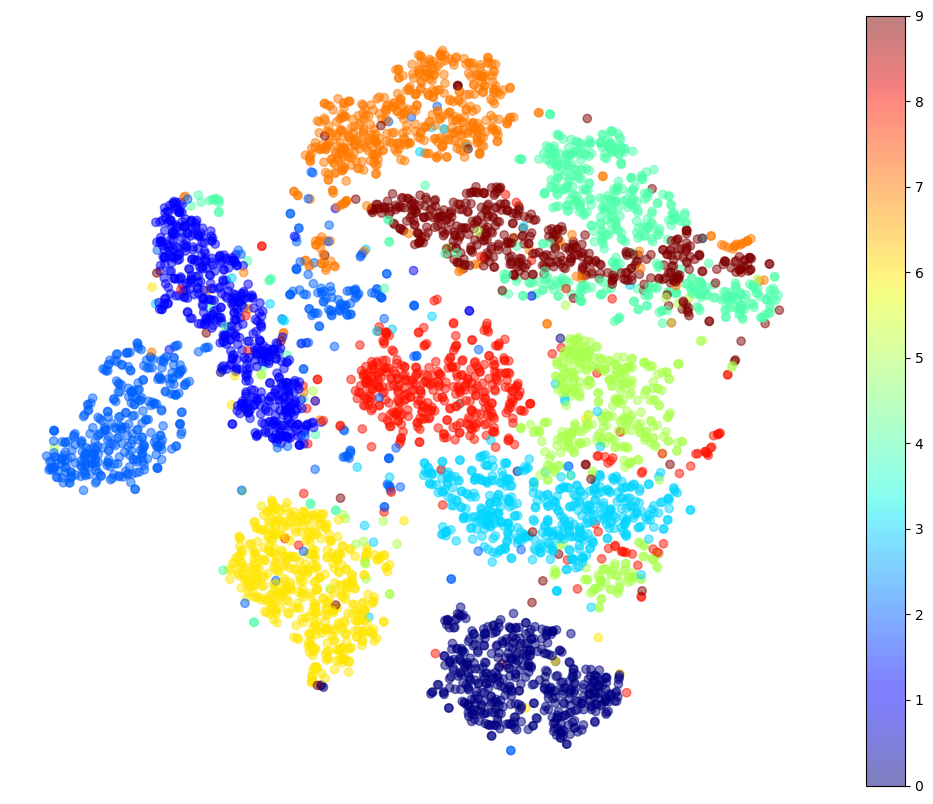

In [65]:
plt.figure(figsize=(13, 10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c = y_sample.astype(np.int8), cmap = "jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

Большинство цифр хорошо отделены от других, хотя t-SNE не задавал цели: он просто идентифицировал кластеры похожих изображений. Но есть еще некоторое совпадение. Например, 3 и 5 сильно перекрываются (в правой части графика), а также 4 и 9 (в верхнем правом углу).

Давайте сосредоточимся только на цифрах 4 и 9:

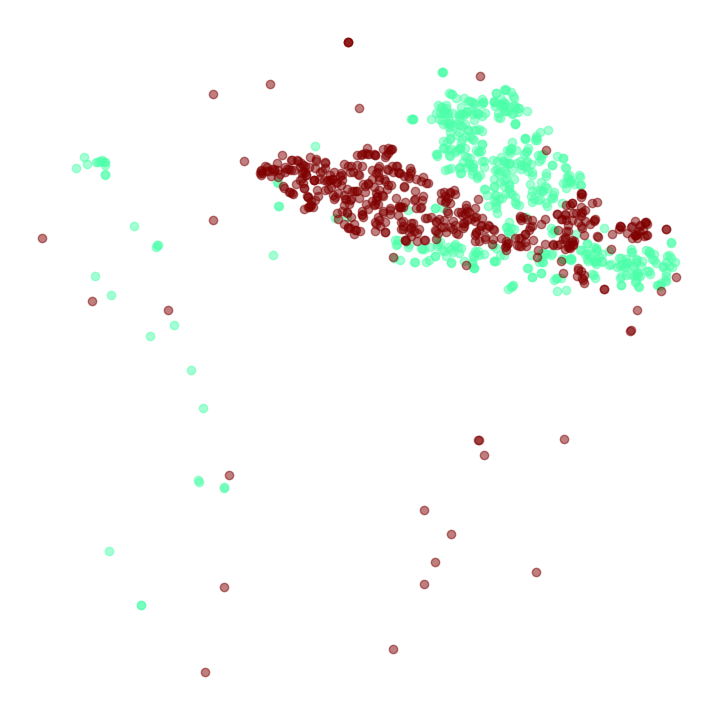

In [69]:
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_tsne[y_sample == digit, 0], X_tsne[y_sample == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

Давайте посмотрим, сможем ли мы создать более красивое изображение, запустив t-SNE только для этих двух цифр:

In [71]:
ind = (y_sample == '4')|(y_sample == '9')
X_sub = X_sample[ind]
y_sub = y_sample[ind]
tnse_sub = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42)
X_sub_tnse = tnse_sub.fit_transform(X_sub)

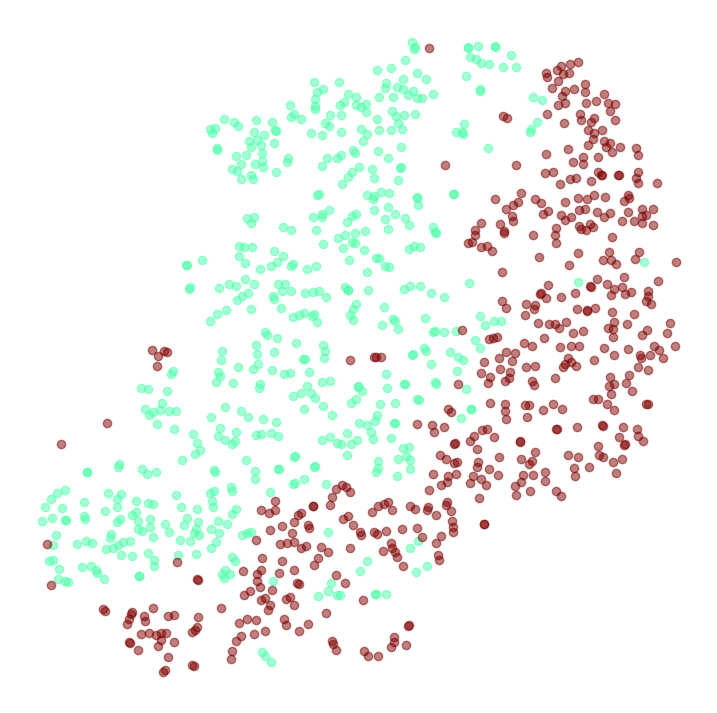

In [73]:
plt.figure(figsize=(9,9))

for ind in ('4','9'):
    plt.scatter(X_sub_tnse[y_sub==ind,0], X_sub_tnse[y_sub==ind,1],c=[cmap(float(ind) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

Это намного лучше, хотя есть еще некоторое совпадение. Возможно, некоторые четверки действительно выглядят как девятки, и наоборот. Было бы неплохо, если бы мы могли визуализировать несколько цифр из каждой области этого графика, чтобы понять, что происходит. 

Создадим функцию plot_digits(), которая будет рисовать диаграмму рассеяния (аналогичную приведенным выше диаграммам рассеяния) и записывать цветные цифры с гарантированным минимальным расстоянием между этими цифрами:

In [74]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

In [77]:
def plot_digits(X, y, min_distance = 0.04, images = None, figsize=(13,10)):
    # масштабируем входные объекты так, чтобы они находились в диапазоне от 0 до 1
    X_scaler = MinMaxScaler().fit_transform(X)
    # Теперь мы создаем список координат нанесенных цифр.
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y) # уникальные элементы массива
    for digit in digits:
        plt.scatter(X_scaler[y==digit,0], X_scaler[y==digit,1], alpha=0.5, c = [cmap(float(digit)/9)])
    plt.axis('off')
    ax = plt.gca() # получаем текущие оси
    for index, image_coord in enumerate(X_scaler): # enumerate() добавляет счетчик к итерируемому объекту 
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min() # вычисляем минимальное евклидово расстояние 
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]] # np.r_: это сокращенное обозначение для объединения массивов вдоль первой оси. 
            # Он работает путем преобразования объектов среза в массивы, а затем их объединения.
            # neighbors = np.r_[neighbors, [image_coord]]: этот код добавляет новый вектор image_coord к neighbors
            # и присваивает результат обратно neighbors. В полученной матрице будет на одну строку больше, чем в исходной neighbors матрице,
            # а последняя строка будет равна image_coord.
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])), # добавит текстовую аннотацию к точечной диаграмме в месте, 
                         color=cmap(float(y[index]) / 9), # указанном с помощью image_coord, с меткой, указанной с помощью y[index], 
                         fontdict={"weight": "bold", "size": 16}) # а также с цветом и стилем шрифта, которые соответствуют метке
            else:
                image = images[index].reshape(28, 28) # эта строка извлекает изображение 28x28 на основе index
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), # это создает OffsetImage объект из изображения 28x28 
                                          image_coord) # AnnotationBbox— это контейнер для OffsetImage
                ax.add_artist(imagebox) # поместит изображение в координаты, указанные image_coord

Сначала давайте покажем цветные цифры (не изображения) для всех 5000 изображений:

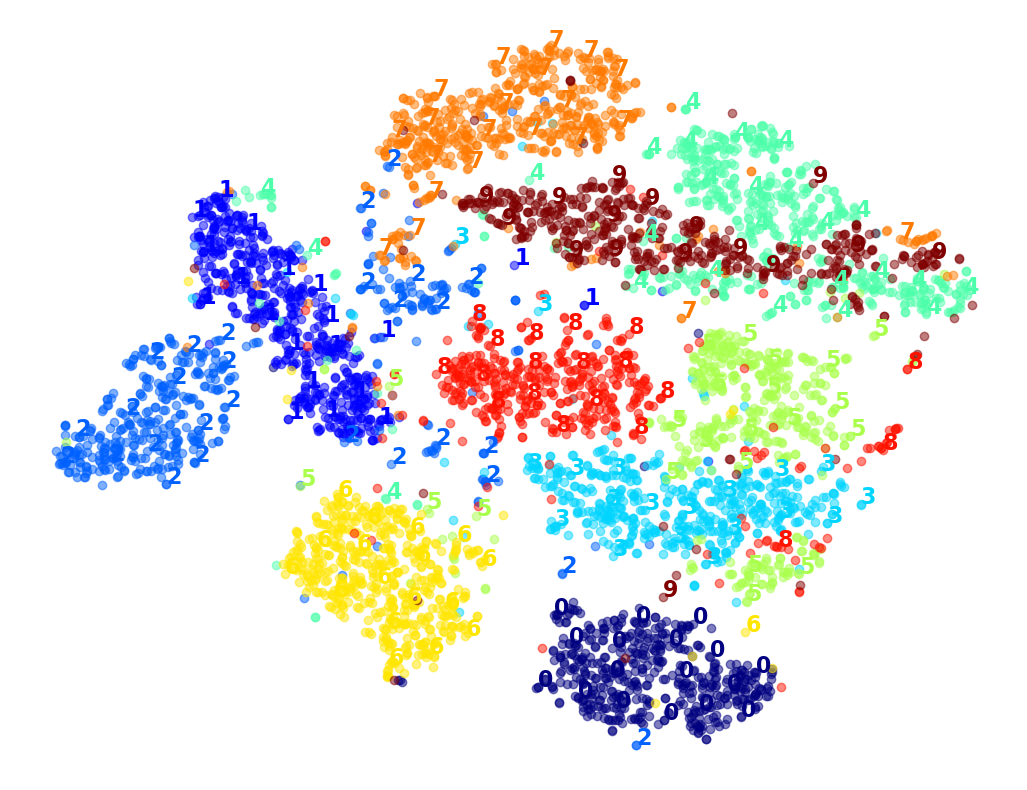

In [78]:
plot_digits(X_tsne, y_sample)

Попробуем с цифровыми изображениями:

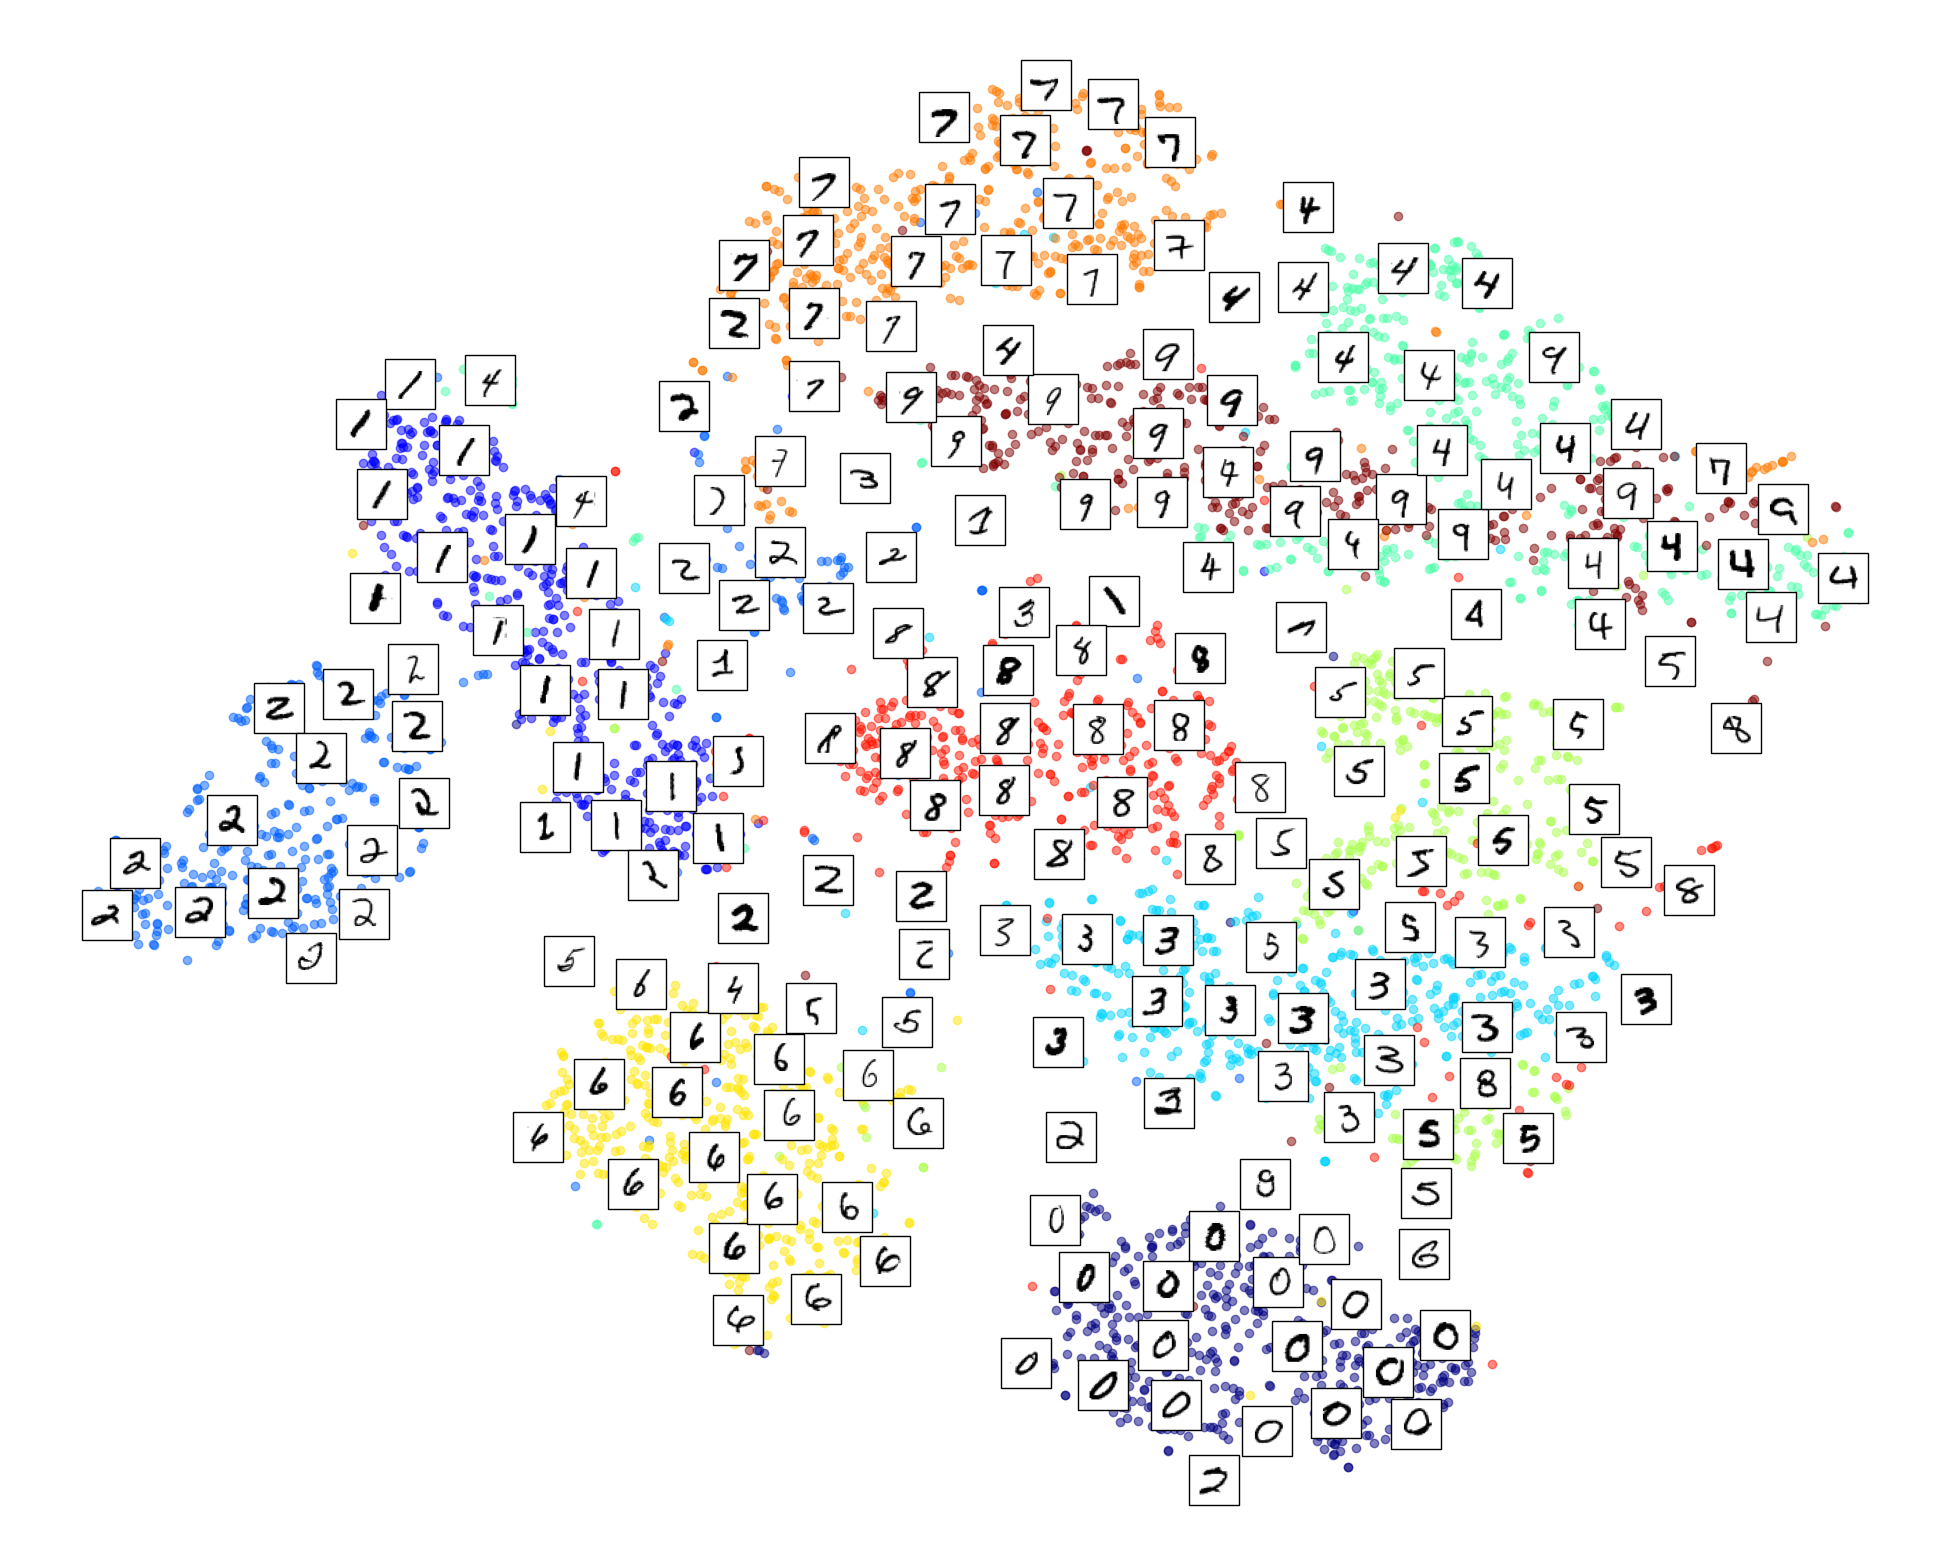

In [80]:
plot_digits(X_tsne, y_sample, images=X_sample, figsize=(25,20))

Теперь давайте сосредоточимся только на 4-х и 9-х:

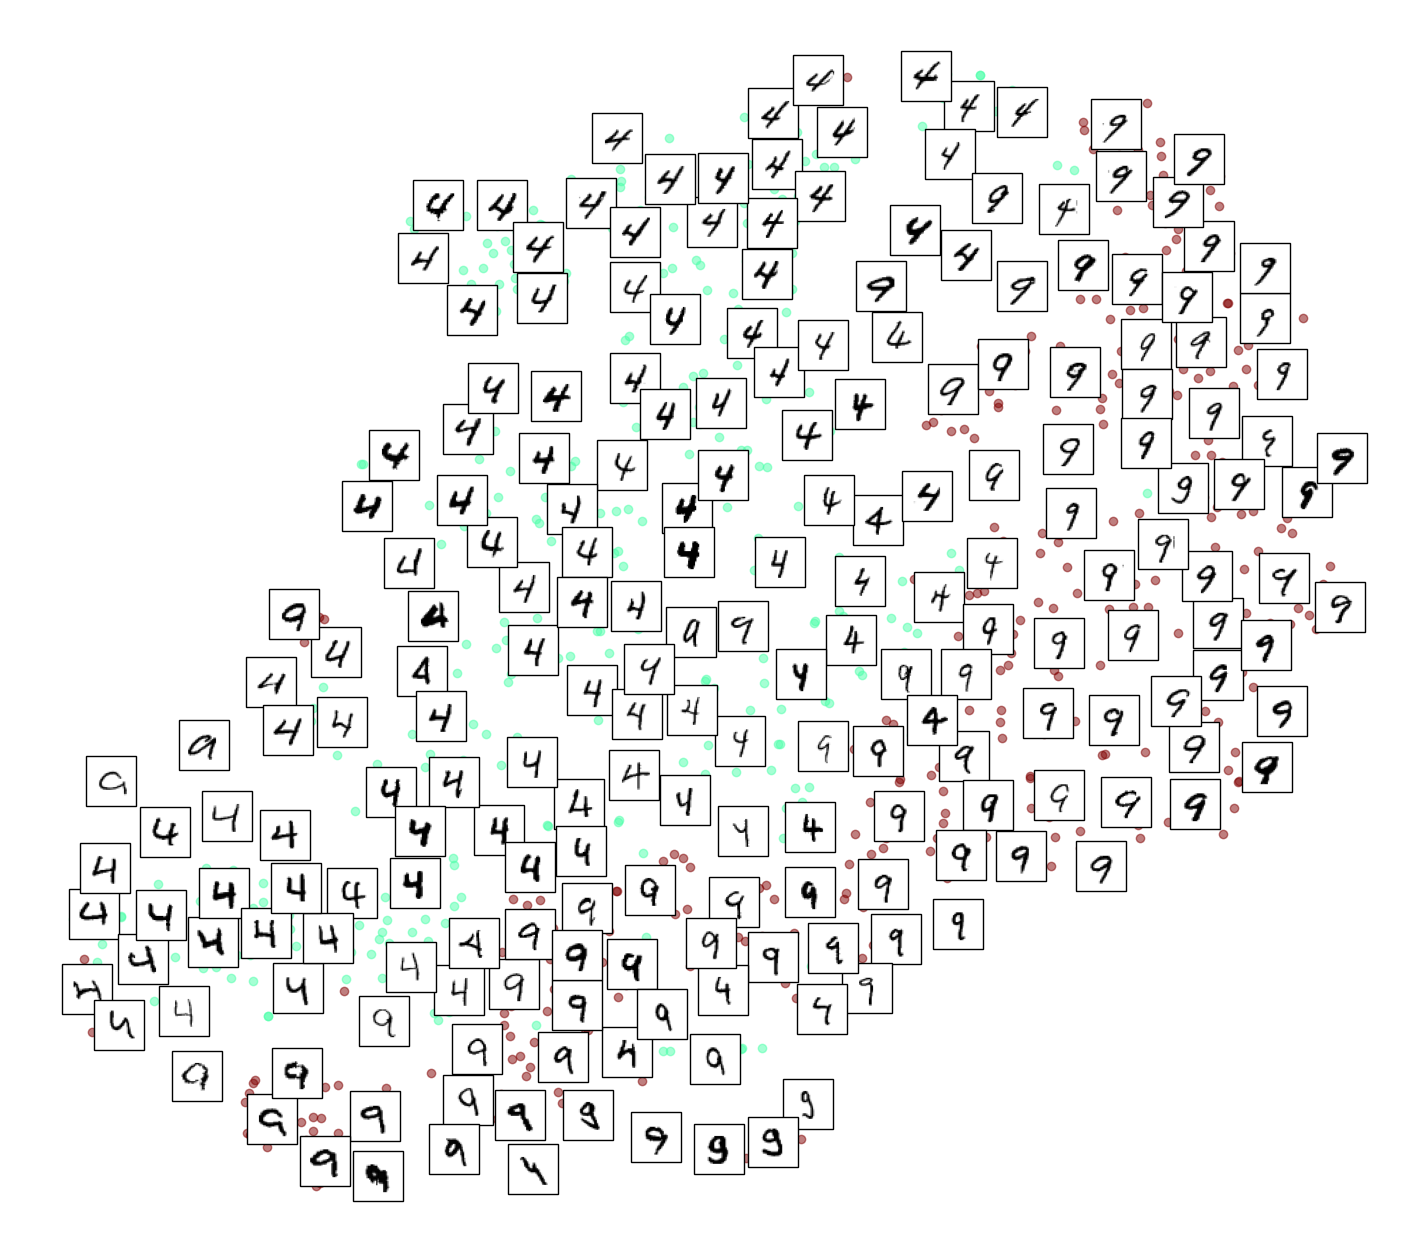

In [86]:
plot_digits(X_sub_tnse, y_sub, images=X_sub, figsize=(18,16))

Попробуем использовать другие алгоритмы уменьшения размерности, такие как PCA, LLE или MDS, и сравним полученные визуализации:

PCA:

In [88]:
pca = PCA(n_components=2, random_state=42)
X_pca_sample = pca.fit_transform(X_sample)

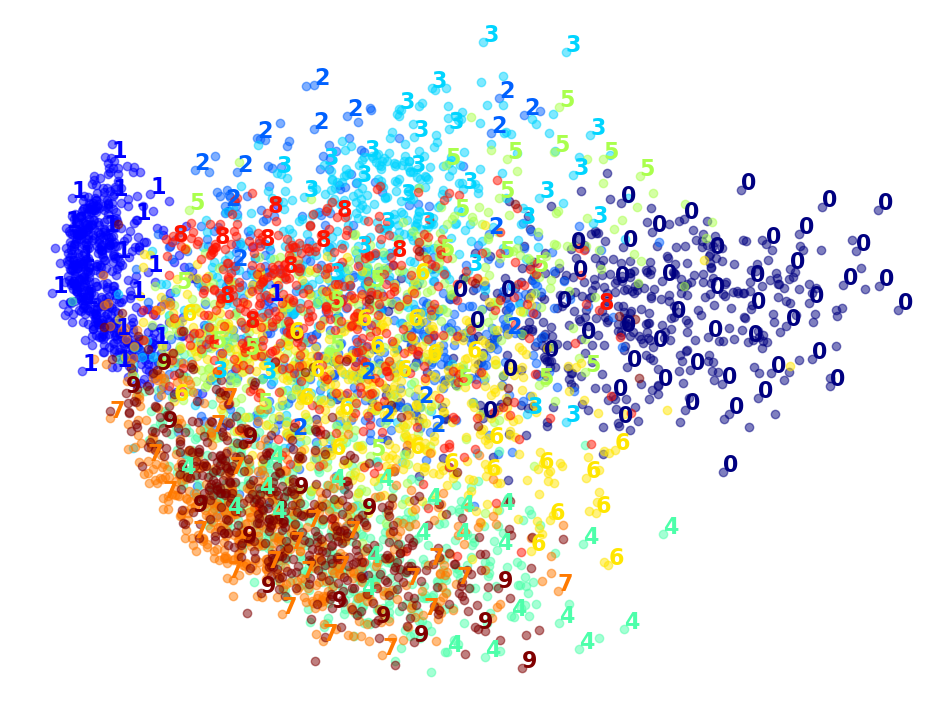

In [91]:
plot_digits(X_pca_sample, y_sample, figsize=(12,9))

В отличии от t-SNE класстеры разделены хуже. Попробуем LLE:

In [92]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle_sample = lle.fit_transform(X_sample)

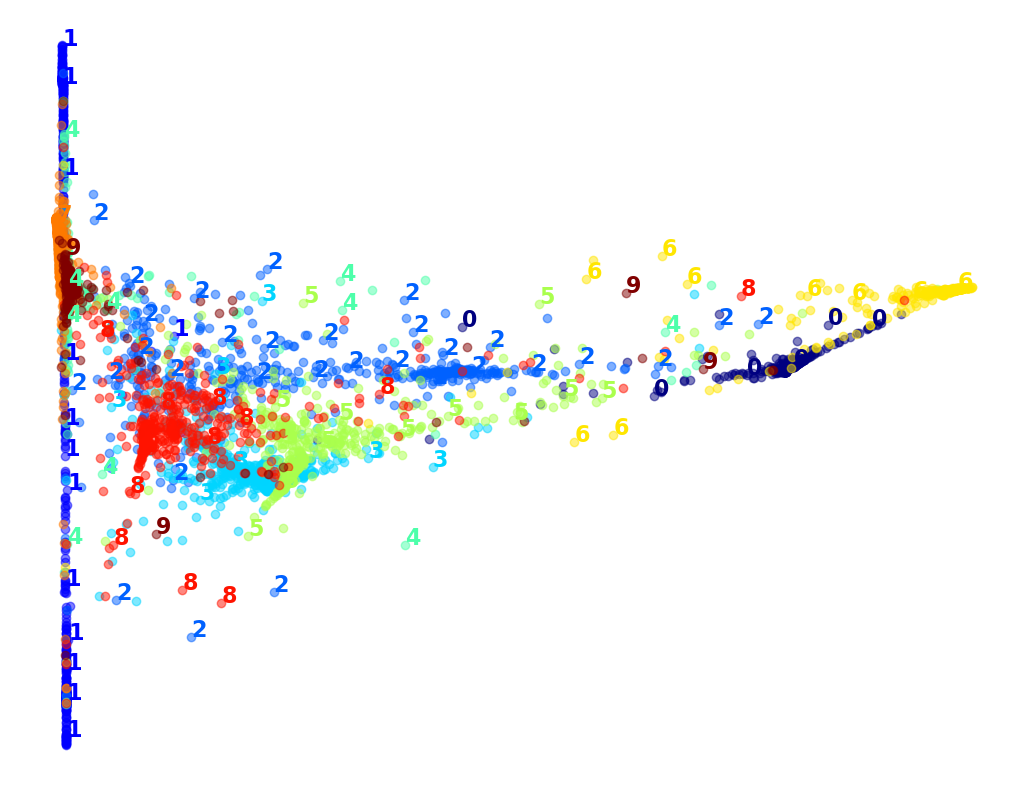

In [93]:
plot_digits(X_lle_sample, y_sample)

Результат стал еще хуже, кластиризация почти остутсвует. Попробуем применить сначала РСА и сохранить 95% дисперсии, а затем LLE:

In [94]:
pca_lle = make_pipeline(PCA(n_components=0.95),
                        LocallyLinearEmbedding(n_components=2, random_state=42))

In [95]:
X_pca_lle = pca_lle.fit_transform(X_sample)

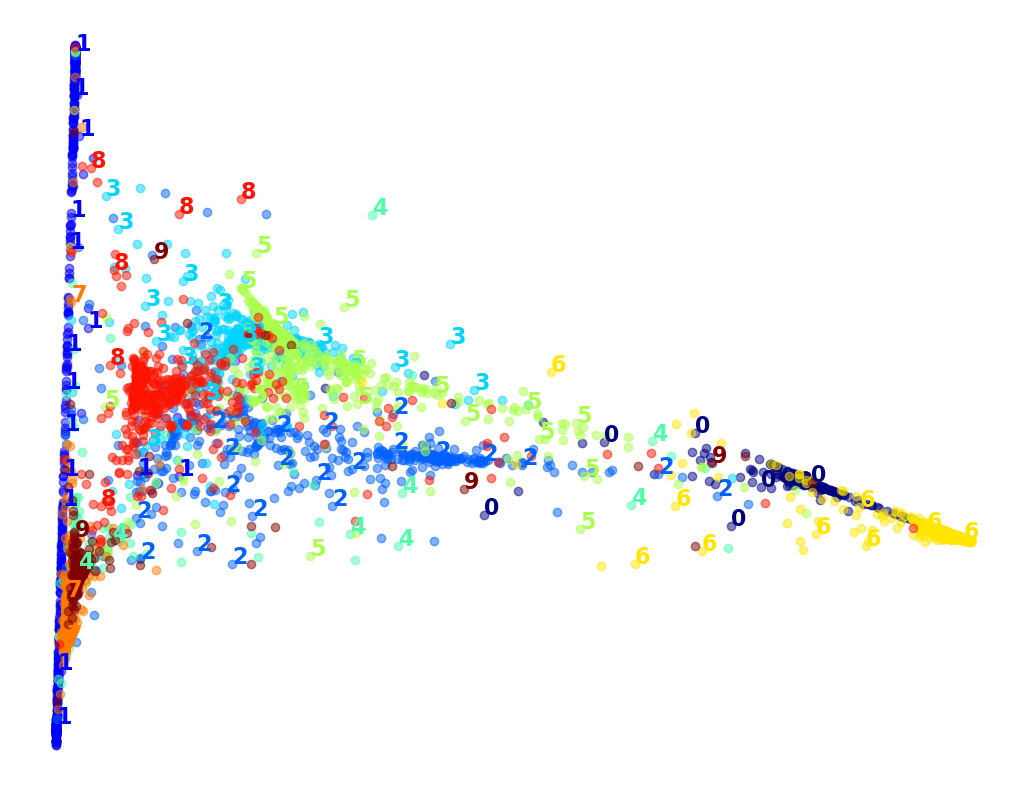

In [96]:
plot_digits(X_pca_lle, y_sample)

Результат не улучшился, применение конвейра трансформации из двух методов не помогло. Попробуем другой способ MDS:

In [97]:
from sklearn.manifold import MDS

In [98]:
mds = MDS(n_components=2, random_state=42)
X_mds_sample = mds.fit_transform(X_sample)

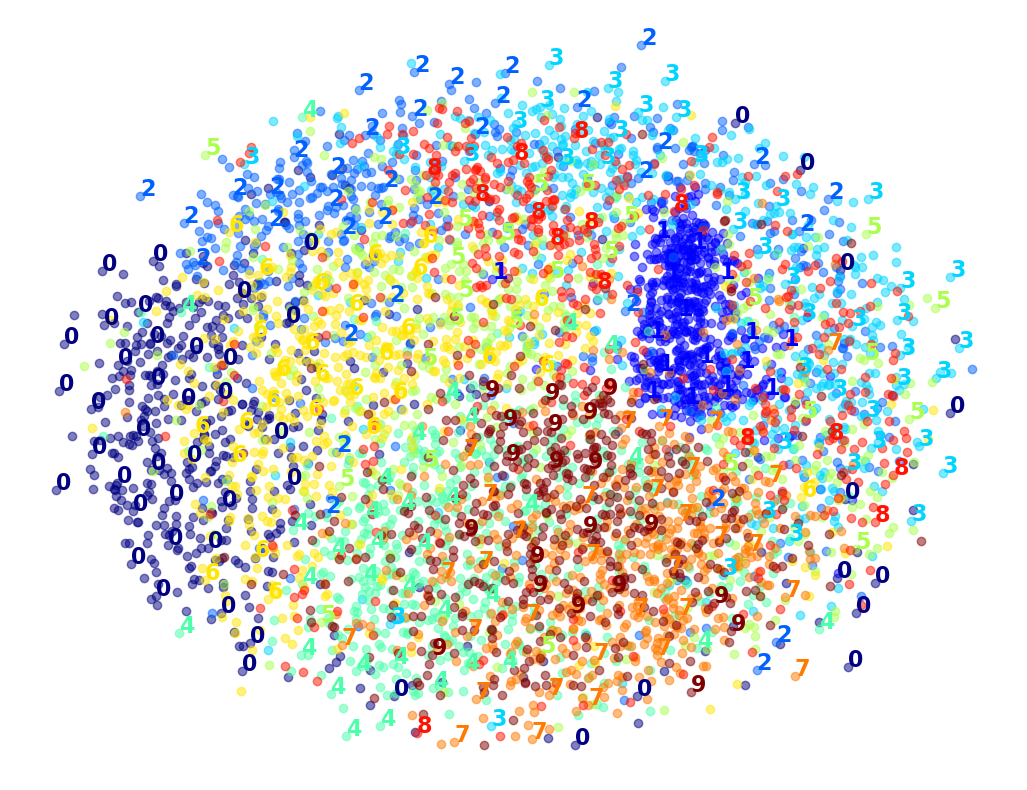

In [99]:
plot_digits(X_mds_sample, y_sample)

результат чуть лучше, чем LLE, но все таки класстеры еще сильно перемешаны. Попробуем сделать этот код более быстрым с помощью создания контейнера и добавления к обработки метода PCA  и посмотрим на результат:

In [100]:
pca_mds = make_pipeline(PCA(n_components=0.95),
                        MDS(n_components=2, random_state=42))

In [101]:
X_pca_mds = pca_mds.fit_transform(X_sample)

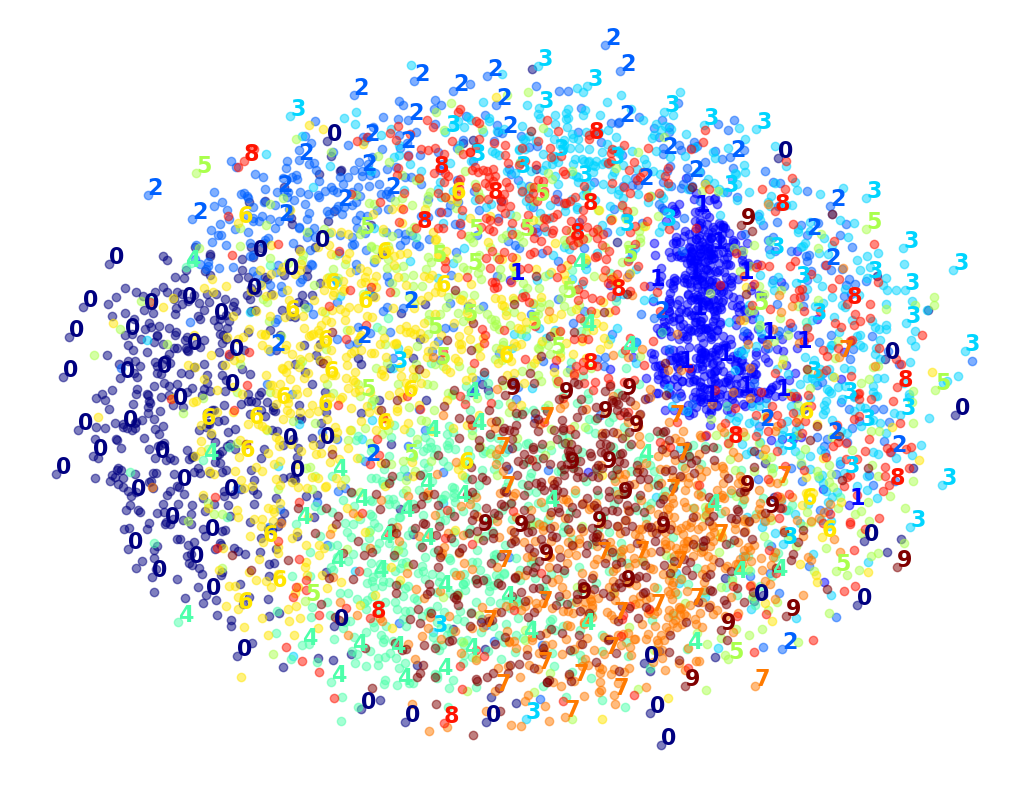

In [102]:
plot_digits(X_pca_mds, y_sample)

Pезультат остался прежним, кластиризация всё еще выглядит плохо, скорость выполнения кода не уменьшилась. Попробуем последний метод уменьшения размерности LDA:

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [105]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_sample = lda.fit_transform(X_sample, y_sample)

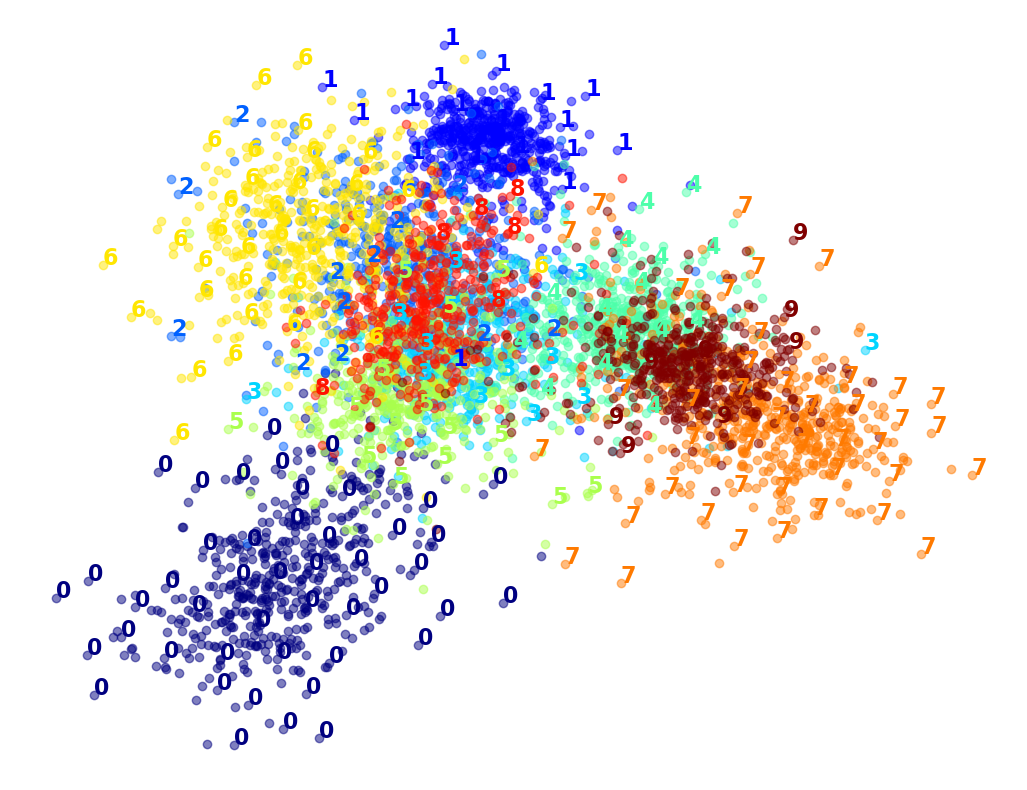

In [106]:
plot_digits(X_lda_sample, y_sample)

Это очень быстро и поначалу выглядит красиво, пока вы не поймете, что несколько кластеров сильно перекрываются.

Что ж, совершенно очевидно, что t-SNE выиграли это маленькое соревнование.